# Exploratory Data Analysis

In this notebook we
1. Load '../Data/data_cleansed.csv' which is the output of data wrangling.
2. Ask & answer questions one by one.
3. Come to a conclusion about Seattle listing price in the end.

## Import Packages

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import matplotlib.cm
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

sns.set()
sns.set_style("whitegrid")
palette = sns.diverging_palette(220, 20, sep = 20, n = 150)
sns.set_palette(palette)

Seattle_shapefile = '../GeoData/WA'

## Load Data

In [2]:
df = pd.read_csv('../Data/data_cleansed.csv')
df.head()

,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,cancellation_policy,cleaning_fee,price,latitude_longitude_bin
0,81,14,0,0,4,1.0,1.0,1.0,4,2,1,61.710904,85.0,4
1,81,14,0,0,4,1.0,1.0,1.0,4,1,2,40.000000,150.0,4
2,81,14,9,0,11,4.5,5.0,7.0,4,10,2,300.000000,975.0,4
3,81,14,0,0,3,1.0,0.0,2.0,4,1,0,61.710904,100.0,4
4,81,14,9,0,6,2.0,3.0,3.0,4,6,2,125.000000,450.0,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 14 columns):
neighbourhood_cleansed    3818 non-null int64
zipcode                   3818 non-null int64
property_type             3818 non-null int64
room_type                 3818 non-null int64
accommodates              3818 non-null int64
bathrooms                 3818 non-null float64
bedrooms                  3818 non-null float64
beds                      3818 non-null float64
bed_type                  3818 non-null int64
guests_included           3818 non-null int64
cancellation_policy       3818 non-null int64
cleaning_fee              3818 non-null float64
price                     3818 non-null float64
latitude_longitude_bin    3818 non-null int64
dtypes: float64(5), int64(9)
memory usage: 417.7 KB


## Prepare functions for Plotting

In [4]:
def get_sub_plot(width = 8, height = 5, label_font_size = 14, tick_font_size = 13):
    fig, ax = plt.subplots()
    fig.set_size_inches(width, height)
    ax.tick_params(labelsize = tick_font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)
    return ax

def get_sub_plots(n_total_cols, n_cols, label_font_size = 14, tick_font_size = 13):
    n_rows = int(n_total_cols / n_cols)
    if n_total_cols % n_cols != 0:
        n_rows += 1

    fig, axes = plt.subplots(nrows = n_rows,
                             ncols = n_cols,
                             squeeze = False)
    
    fig.set_size_inches(20, 5)  
    
    if n_total_cols % n_cols != 0:
        for col in range(n_total_cols % n_cols, n_cols):
            fig.delaxes(axes[n_rows - 1][col])

    axes = axes.flatten()
    
    for ax in axes:
        ax.tick_params(labelsize = tick_font_size)
        ax.set_xlabel(ax.get_xlabel(), fontsize = label_font_size)
        ax.set_ylabel(ax.get_ylabel(), fontsize = label_font_size)

    return (fig, axes)

In [5]:
def plot_dist(df):
    ax = get_sub_plot()
    sns.distplot(df, ax = ax)
    plt.show()

In [6]:
def plot_count_plot(df, col):
    ax = get_sub_plot()
    sns.countplot(x = col, data = df, ax = ax)
    plt.show()

In [7]:
def plot_scatter_and_swarm(x, y, data, hue = None, n_cols = 3):
    n_total_cols = 2
    fig, axes = get_sub_plots(n_total_cols, n_cols)
    
    sns.swarmplot(x = x, y = y, hue = hue, data = data, ax = axes[0])
    sns.regplot(x = df[x], y = df[y], ax = axes[1])
                    
    fig.tight_layout()    
    plt.show()

## Plot Price Distribution

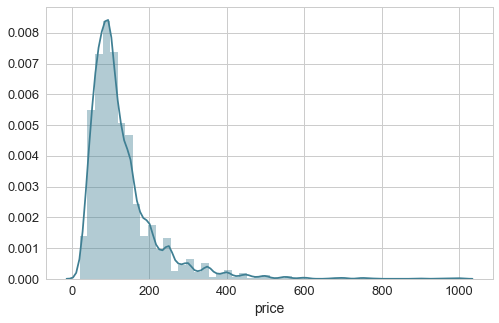

In [8]:
plot_dist(df['price'])

In [9]:
df.describe()

,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,cancellation_policy,cleaning_fee,price,latitude_longitude_bin
count,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000
mean,37.548455,9.733106,4.927187,0.365113,3.349398,1.259469,1.307712,1.735394,3.910424,1.672603,1.069932,61.710904,127.976166,3.648245
std,26.511927,6.999140,4.623123,0.541453,1.977599,0.589130,0.882700,1.139330,0.475043,1.311040,0.817084,41.725079,90.250022,1.248588
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,20.000000,0.000000
25%,12.000000,3.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,0.000000,35.000000,75.000000,4.000000
50%,37.000000,9.000000,9.000000,0.000000,3.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,61.710904,100.000000,4.000000
75%,58.000000,15.000000,9.000000,1.000000,4.000000,1.000000,2.000000,2.000000,4.000000,2.000000,2.000000,65.000000,150.000000,4.000000
max,86.000000,28.000000,16.000000,2.000000,16.000000,8.000000,7.000000,15.000000,4.000000,15.000000,2.000000,300.000000,1000.000000,7.000000


Looks like most of the price is within 200, with mean equals to 127, medium equals to 100. min 20, maximum 1000.

## Load shapefile & combine them into current DataFrame

In [10]:
def load_shapefile(llcrnrlon = -122.459696, llcrnrlat = 47.491912,
                 urcrnrlon = -122.224433, urcrnrlat = 47.734145,
                 shapeFile = Seattle_shapefile):
    m = Basemap(resolution = 'h', # c, l, i, h, f or None
                projection = 'merc',
                lat_0 = (llcrnrlat + urcrnrlat) / 2, lon_0 = (llcrnrlon + urcrnrlon) / 2,
                llcrnrlon = llcrnrlon, llcrnrlat = llcrnrlat,
                urcrnrlon = urcrnrlon, urcrnrlat = urcrnrlat)

    m.readshapefile(shapeFile, 'areas')
    
    names = set()
    
    areas = []
    shapes = []
    for area, shape in zip(m.areas_info, m.areas):
        if area['City'] == 'Seattle':
            name = area['Name']
            if name not in names:
                areas.append(area['Name'])
                shapes.append(Polygon(np.array(shape), True))
                names.add(name)
      
    df_poly = pd.DataFrame({'shapes': shapes, 'area': areas})
    
    return df_poly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 2 columns):
area      103 non-null object
shapes    103 non-null object
dtypes: object(2)
memory usage: 1.7+ KB


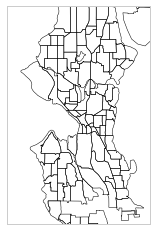

In [11]:
# Revert the neighbourhood_group_cleansed
le = preprocessing.LabelEncoder()
le.classes_ = np.load('../Label Encoder/neighbourhood_cleansed.npy')
df['neighbourhood_cleansed_reverted'] = df['neighbourhood_cleansed'].apply(lambda x: le.inverse_transform(x))

# Load ShapeFile into a dataframe
df_poly = load_shapefile()
df_poly.info()

In [12]:
df_merge = pd.merge(df, df_poly, left_on = 'neighbourhood_cleansed_reverted', right_on = 'area', how = 'left')
df_merge.head()

,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,cancellation_policy,cleaning_fee,price,latitude_longitude_bin,neighbourhood_cleansed_reverted,area,shapes
0,81,14,0,0,4,1.0,1.0,1.0,4,2,1,61.710904,85.0,4,West Queen Anne,West Queen Anne,"Poly((9278.77, 24876.6) ...)"
1,81,14,0,0,4,1.0,1.0,1.0,4,1,2,40.000000,150.0,4,West Queen Anne,West Queen Anne,"Poly((9278.77, 24876.6) ...)"
2,81,14,9,0,11,4.5,5.0,7.0,4,10,2,300.000000,975.0,4,West Queen Anne,West Queen Anne,"Poly((9278.77, 24876.6) ...)"
3,81,14,0,0,3,1.0,0.0,2.0,4,1,0,61.710904,100.0,4,West Queen Anne,West Queen Anne,"Poly((9278.77, 24876.6) ...)"
4,81,14,9,0,6,2.0,3.0,3.0,4,6,2,125.000000,450.0,4,West Queen Anne,West Queen Anne,"Poly((9278.77, 24876.6) ...)"


In [13]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 17 columns):
neighbourhood_cleansed             3818 non-null int64
zipcode                            3818 non-null int64
property_type                      3818 non-null int64
room_type                          3818 non-null int64
accommodates                       3818 non-null int64
bathrooms                          3818 non-null float64
bedrooms                           3818 non-null float64
beds                               3818 non-null float64
bed_type                           3818 non-null int64
guests_included                    3818 non-null int64
cancellation_policy                3818 non-null int64
cleaning_fee                       3818 non-null float64
price                              3818 non-null float64
latitude_longitude_bin             3818 non-null int64
neighbourhood_cleansed_reverted    3818 non-null object
area                               2816 non-null object
s

## Check neighborhood that does not have an area/shape mapping based on the shapefile.

In [14]:
df_merge[df_merge.shapes.isnull()].groupby('neighbourhood_cleansed_reverted').count()

,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,cancellation_policy,cleaning_fee,price,latitude_longitude_bin,area,shapes
neighbourhood_cleansed_reverted,,,,,,,,,,,,,,,,
Adams,70,70,70,70,70,70,70,70,70,70,70,70,70,70,0,0
Briarcliff,14,14,14,14,14,14,14,14,14,14,14,14,14,14,0,0
Broadway,397,397,397,397,397,397,397,397,397,397,397,397,397,397,0,0
Central Business District,103,103,103,103,103,103,103,103,103,103,103,103,103,103,0,0
Harrison/Denny-Blaine,14,14,14,14,14,14,14,14,14,14,14,14,14,14,0,0
Lawton Park,30,30,30,30,30,30,30,30,30,30,30,30,30,30,0,0
Mann,67,67,67,67,67,67,67,67,67,67,67,67,67,67,0,0
Mid-Beacon Hill,30,30,30,30,30,30,30,30,30,30,30,30,30,30,0,0
Mount Baker,50,50,50,50,50,50,50,50,50,50,50,50,50,50,0,0


In [15]:
# Map them in to correct area of shapefile.
df['neighbourhood_cleansed_reverted'] = df['neighbourhood_cleansed_reverted'].apply(lambda x: 'Ballard' if (x == 'Adams') else x)
df['neighbourhood_cleansed_reverted'] = df['neighbourhood_cleansed_reverted'].apply(lambda x: 'Magnolia' if (x == 'Briarcliff') else x)
df['neighbourhood_cleansed_reverted'] = df['neighbourhood_cleansed_reverted'].apply(lambda x: 'Downtown' if (x == 'Central Business District') else x)
df['neighbourhood_cleansed_reverted'] = df['neighbourhood_cleansed_reverted'].apply(lambda x: 'Denny - Blaine' if (x == 'Harrison/Denny-Blaine') else x)
df['neighbourhood_cleansed_reverted'] = df['neighbourhood_cleansed_reverted'].apply(lambda x: 'Magnolia' if (x == 'Lawton Park') else x)
df['neighbourhood_cleansed_reverted'] = df['neighbourhood_cleansed_reverted'].apply(lambda x: 'Magnolia' if (x == 'Southeast Magnolia') else x)
df['neighbourhood_cleansed_reverted'] = df['neighbourhood_cleansed_reverted'].apply(lambda x: 'Admiral' if (x == 'North Admiral') else x)
df['neighbourhood_cleansed_reverted'] = df['neighbourhood_cleansed_reverted'].apply(lambda x: 'Beacon Hill' if (x == 'Mid-Beacon Hill') else x)
df['neighbourhood_cleansed_reverted'] = df['neighbourhood_cleansed_reverted'].apply(lambda x: 'Mt. Baker' if (x == 'Mount Baker') else x)
df['neighbourhood_cleansed_reverted'] = df['neighbourhood_cleansed_reverted'].apply(lambda x: 'North Beach' if (x == 'North Beach/Blue Ridge') else x)
df['neighbourhood_cleansed_reverted'] = df['neighbourhood_cleansed_reverted'].apply(lambda x: 'Waterfront' if (x == 'Pike-Market') else x)
df['neighbourhood_cleansed_reverted'] = df['neighbourhood_cleansed_reverted'].apply(lambda x: 'Madison Valley' if (x == 'Stevens') else x)
df['neighbourhood_cleansed_reverted'] = df['neighbourhood_cleansed_reverted'].apply(lambda x: 'Central' if (x == 'Mann') else x)
df['neighbourhood_cleansed_reverted'] = df['neighbourhood_cleansed_reverted'].apply(lambda x: 'First Hill' if (x == 'Broadway') else x)

In [16]:
df_merge = pd.merge(df, df_poly, left_on = 'neighbourhood_cleansed_reverted', right_on = 'area', how = 'left')

In [17]:
# Update neighbourhood_cleansed based on the cleaned neighbourhood_cleansed_reverted.
le = preprocessing.LabelEncoder()
le.fit(df['neighbourhood_cleansed_reverted'])
df['neighbourhood_cleansed'] = le.transform(df['neighbourhood_cleansed_reverted'])

In [18]:
# Make sure we don't have missing data in area & shapes columns now
df_merge[df_merge.shapes.isnull()].groupby('neighbourhood_cleansed_reverted').count()

,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,cancellation_policy,cleaning_fee,price,latitude_longitude_bin,area,shapes
neighbourhood_cleansed_reverted,,,,,,,,,,,,,,,,


In [19]:
df_merge = df_merge.drop(['area'], axis = 1)
df = df_merge
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 16 columns):
neighbourhood_cleansed             3818 non-null int64
zipcode                            3818 non-null int64
property_type                      3818 non-null int64
room_type                          3818 non-null int64
accommodates                       3818 non-null int64
bathrooms                          3818 non-null float64
bedrooms                           3818 non-null float64
beds                               3818 non-null float64
bed_type                           3818 non-null int64
guests_included                    3818 non-null int64
cancellation_policy                3818 non-null int64
cleaning_fee                       3818 non-null float64
price                              3818 non-null float64
latitude_longitude_bin             3818 non-null int64
neighbourhood_cleansed_reverted    3818 non-null object
shapes                             3818 non-null object
d

In [20]:
df.head()

,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,cancellation_policy,cleaning_fee,price,latitude_longitude_bin,neighbourhood_cleansed_reverted,shapes
0,81,14,0,0,4,1.0,1.0,1.0,4,2,1,61.710904,85.0,4,West Queen Anne,"Poly((9278.77, 24876.6) ...)"
1,81,14,0,0,4,1.0,1.0,1.0,4,1,2,40.000000,150.0,4,West Queen Anne,"Poly((9278.77, 24876.6) ...)"
2,81,14,9,0,11,4.5,5.0,7.0,4,10,2,300.000000,975.0,4,West Queen Anne,"Poly((9278.77, 24876.6) ...)"
3,81,14,0,0,3,1.0,0.0,2.0,4,1,0,61.710904,100.0,4,West Queen Anne,"Poly((9278.77, 24876.6) ...)"
4,81,14,9,0,6,2.0,3.0,3.0,4,6,2,125.000000,450.0,4,West Queen Anne,"Poly((9278.77, 24876.6) ...)"


## Assuming the listing price would be affected by location. Let's plot average lising price of each neighborhood on map to verify.

In [21]:
def plot_city_map(llcrnrlon = -122.459696, llcrnrlat = 47.491912,
                  urcrnrlon = -122.224433, urcrnrlat = 47.734145,
                  shapeFile = Seattle_shapefile,
                  data = None, val_col = None, shape_col = None):
    fig, ax = plt.subplots()
    fig.set_size_inches(18, 27)
 
    m = Basemap(resolution = 'f', # c, l, i, h, f or None
                projection = 'merc',
                lat_0 = (llcrnrlat + urcrnrlat) / 2, lon_0 = (llcrnrlon + urcrnrlon) / 2,
                llcrnrlon = llcrnrlon, llcrnrlat = llcrnrlat,
                urcrnrlon = urcrnrlon, urcrnrlat = urcrnrlat)

    m.drawmapboundary(fill_color='#a9cbce')
    m.fillcontinents(color='#f2f2f2',lake_color='#a9cbce')
    m.drawcoastlines()
    
    m.readshapefile(shapeFile, 'areas')
    
    names = set()
    
    for area, shape in zip(m.areas_info, m.areas):
        if area['City'] == 'Seattle':
            name = area['Name']
            if name not in names:
                x, y = 0, 0
                for poly in shape:
                    x += poly[0]
                    y += poly[1]
                x /= len(shape)
                y /= len(shape)
                plt.text(x - 10, y, name, fontsize = 12)
                names.add(name)
                
    values = []
    shapes = []
    
    for val, shape in zip(data[val_col], data[shape_col]):
        values.append(val)
        shapes.append(shape)
    
    if data is not None and val is not None and shape is not None:
        cmap = plt.get_cmap('GnBu')   
        pc = PatchCollection(shapes, zorder=2)
        norm = Normalize()
        
        pc.set_facecolor(cmap(norm(values)))
        ax.add_collection(pc)

        mapper = matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap)
        mapper.set_array(values)
        plt.colorbar(mapper, shrink=0.4)
    
    plt.show()

In [22]:
df_area_mean_price = df.groupby('neighbourhood_cleansed_reverted').agg({'price' : 'mean'}).reset_index()
df_area_mean_price = pd.merge(df_area_mean_price, df_poly, left_on = 'neighbourhood_cleansed_reverted', right_on = 'area', how = 'left')
df_area_mean_price = df_area_mean_price.drop('area', axis = 1)

/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


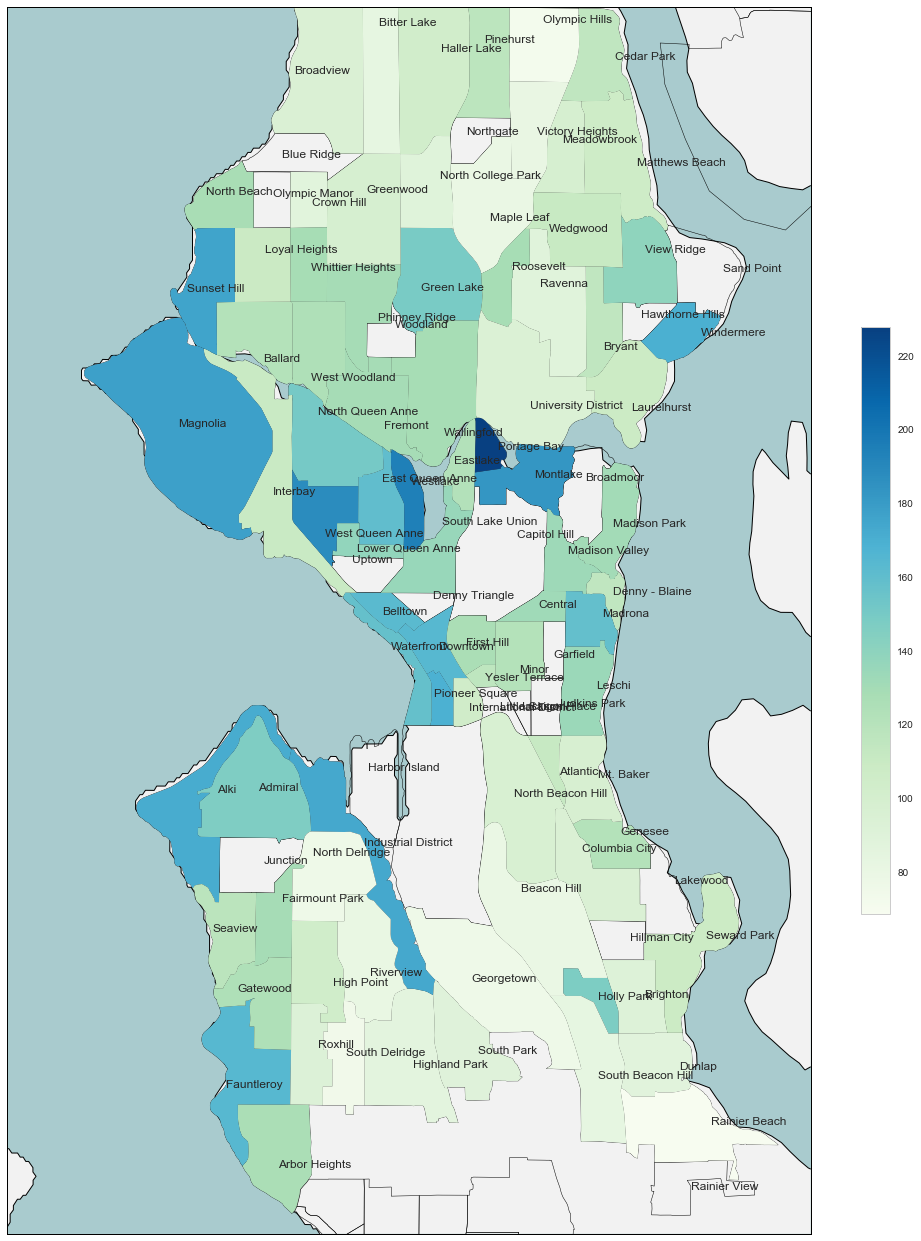

In [23]:
plot_city_map(data = df_area_mean_price, shape_col = 'shapes', val_col = 'price')

In [24]:
df_area_mean_price.sort_values(by = 'price', ascending = False).head(10)

,neighbourhood_cleansed_reverted,price,shapes
59,Portage Bay,227.857143,"Poly((15644.1, 26391.1) ...)"
80,Westlake,194.470588,"Poly((13562.9, 22567) ...)"
78,West Queen Anne,187.769231,"Poly((9278.77, 24876.6) ...)"
48,Montlake,182.789474,"Poly((17724.2, 25580.3) ...)"
43,Magnolia,177.672131,"Poly((5703.04, 29769.1) ...)"
71,Sunset Hill,176.055556,"Poly((6803.76, 28622.1) ...)"
33,Industrial District,173.333333,"Poly((9763.46, 15208.7) ...)"
1,Alki,171.619048,"Poly((8291.92, 17203.7) ...)"
82,Windermere,169.900000,"Poly((22406.1, 29953.6) ...)"
58,Pioneer Square,169.260870,"Poly((13873, 18343.5) ...)"


Yes the mean listing price of different neighborhood is quite different. And Portage Bay has the highest mean listing price.

## Assuming that the listing price is also porportional to accommodates, bedrooms, bathrooms and neighbourhood. Let's verify.

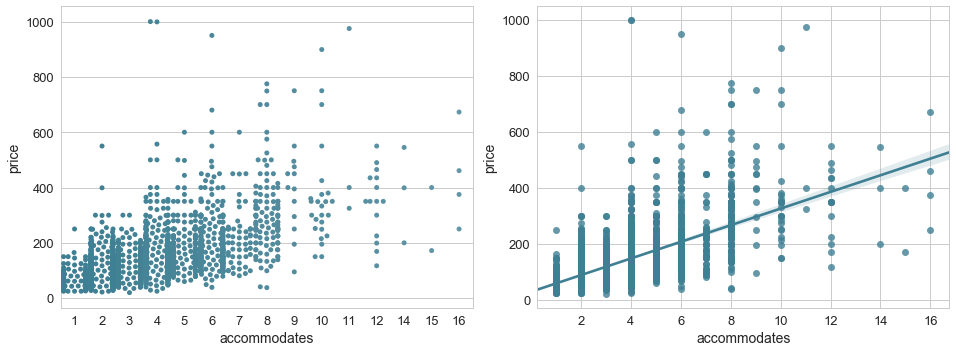

In [25]:
plot_scatter_and_swarm(x = 'accommodates', y = 'price', data = df)

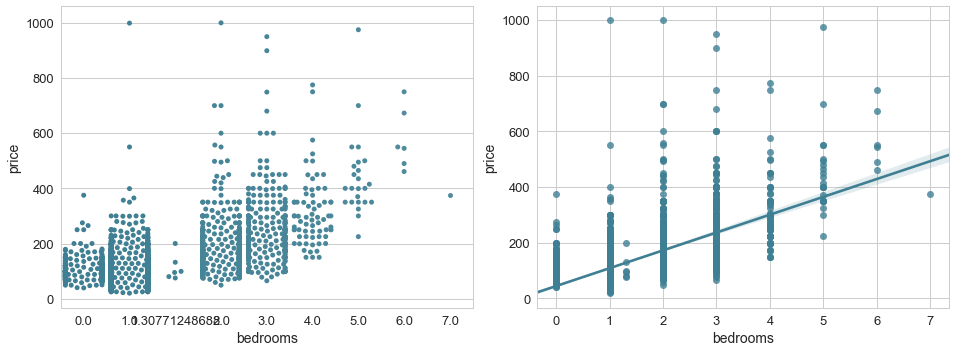

In [26]:
plot_scatter_and_swarm(x = 'bedrooms', y = 'price', data = df)

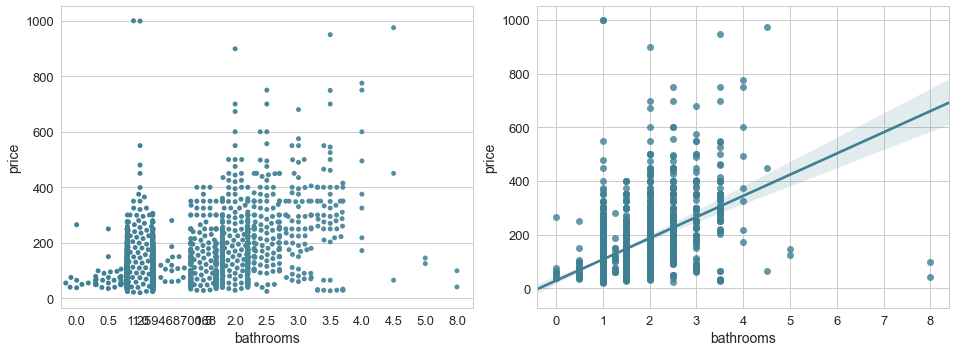

In [27]:
plot_scatter_and_swarm(x = 'bathrooms', y = 'price', data = df)

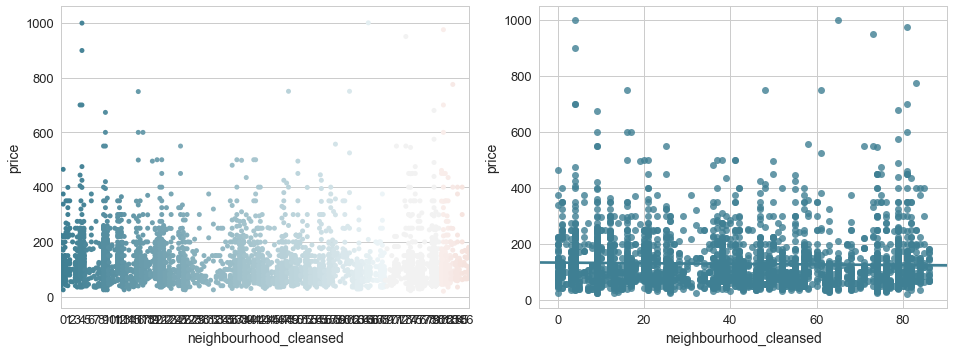

In [28]:
plot_scatter_and_swarm(x = 'neighbourhood_cleansed', y = 'price', data = df)

### From the above scatter plots, why there is a data point where there is only 1 bedroom but price is high?

In [29]:
df[(df.bedrooms == 1) & (df.bathrooms == 1)].sort_values(by = 'price', ascending = False).head()

,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,cancellation_policy,cleaning_fee,price,latitude_longitude_bin,neighbourhood_cleansed_reverted,shapes
1208,4,0,0,0,4,1.0,1.0,1.0,4,1,1,85.000000,999.0,4,Belltown,"Poly((11382.3, 20871.9) ...)"
3436,73,26,0,0,2,1.0,1.0,1.0,4,1,0,61.710904,550.0,4,Magnolia,"Poly((5703.04, 29769.1) ...)"
1760,1,11,9,1,2,1.0,1.0,1.0,4,1,0,61.710904,399.0,0,Alki,"Poly((8291.92, 17203.7) ...)"
1498,12,0,0,0,4,1.0,1.0,1.0,4,1,2,45.000000,365.0,4,Downtown,"Poly((14325.2, 19624.3) ...)"
1701,60,3,0,0,4,1.0,1.0,3.0,4,1,2,150.000000,350.0,4,Pioneer Square,"Poly((13873, 18343.5) ...)"


Look normal though.

### From the above scatter plots, why there are some data points with 8 bathrooms but listing price is low?

In [30]:
df[df.bathrooms == 8].sort_values(by = 'price', ascending = True).head()

,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,cancellation_policy,cleaning_fee,price,latitude_longitude_bin,neighbourhood_cleansed_reverted,shapes
1073,58,0,8,2,8,8.0,1.0,8.0,4,1,0,61.710904,41.0,4,Waterfront,"Poly((12442.4, 19691.6) ...)"
2645,9,1,1,1,2,8.0,1.0,1.0,4,1,1,61.710904,99.0,4,First Hill,"Poly((15893.4, 18831.1) ...)"


In [31]:
le = preprocessing.LabelEncoder()
le.classes_ = np.load('../Label Encoder/property_type.npy')
print(le.inverse_transform(8))

Dorm


For the 1st data point, might be because its property_type is "Dorm".


For the 2st data point, it can only accommodate 2 people & has only 1 bed room. The price should be dominate by other factors.

### From the scatter plot above, why there are data points that can accommodate 14 people but the listing price do not increase linearly?

In [32]:
df[(df.accommodates >= 14) & (df.price < 500)].sort_values(by = 'price', ascending = False)

,neighbourhood_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,cancellation_policy,cleaning_fee,price,latitude_longitude_bin,neighbourhood_cleansed_reverted,shapes
14,81,14,9,0,16,3.5,6.0,15.0,4,8,2,300.0,461.0,4,West Queen Anne,"Poly((9278.77, 24876.6) ...)"
601,42,16,9,0,15,3.0,5.0,9.0,4,11,2,200.0,400.0,4,Central,"Poly((18179.8, 20112.7) ...)"
2091,52,22,9,0,14,3.0,5.0,9.0,4,5,2,155.0,399.0,1,North Beacon Hill,"Poly((18114.8, 13835.6) ...)"
3351,57,2,9,0,16,4.0,7.0,10.0,4,6,2,300.0,375.0,4,Phinney Ridge,"Poly((12568.4, 30403.5) ...)"
3803,21,2,9,0,16,3.5,4.0,10.0,4,12,1,100.0,250.0,4,Fremont,"Poly((11688.9, 28057.4) ...)"
2195,15,13,9,0,14,2.0,2.0,3.0,4,3,1,40.0,200.0,2,Dunlap,"Poly((21092.2, 6546.26) ...)"
1200,6,26,9,0,15,4.0,4.0,7.0,4,2,2,150.0,172.0,3,Magnolia,"Poly((5703.04, 29769.1) ...)"


In [33]:
print(le.inverse_transform(9))

House


In [34]:
def cal_accommodates_bedroom_ratio(x):
    if x['bedrooms'] != 0:
        return x['accommodates'] / x['bedrooms']
    else:
        return x['accommodates'] / 0.5
    
def cal_accommodates_bathrooms_ratio(x):
    if x['bathrooms'] != 0:
        return x['accommodates'] / x['bathrooms']
    else:
        return x['accommodates'] / 0.5
    
df['accommodates_bedroom_ratio']  = df.apply(cal_accommodates_bedroom_ratio, axis = 1)
df['accommodates_bathroom_ratio'] = df.apply(cal_accommodates_bathrooms_ratio, axis = 1)

In [35]:
df[(df.accommodates >= 14) & (df.price < 500)][['accommodates', 'bedrooms', 'bathrooms', 'accommodates_bedroom_ratio', 'accommodates_bathroom_ratio', 'price']].sort_values(by = 'price', ascending = False)

,accommodates,bedrooms,bathrooms,accommodates_bedroom_ratio,accommodates_bathroom_ratio,price
14,16,6.0,3.5,2.666667,4.571429,461.0
601,15,5.0,3.0,3.000000,5.000000,400.0
2091,14,5.0,3.0,2.800000,4.666667,399.0
3351,16,7.0,4.0,2.285714,4.000000,375.0
3803,16,4.0,3.5,4.000000,4.571429,250.0
2195,14,2.0,2.0,7.000000,7.000000,200.0
1200,15,4.0,4.0,3.750000,3.750000,172.0


In [36]:
df[(df.accommodates >= 14) & (df.price < 500)][['accommodates', 'bedrooms', 'bathrooms', 'accommodates_bedroom_ratio', 'accommodates_bathroom_ratio', 'price']].sort_values(by = 'price', ascending = False).describe()

,accommodates,bedrooms,bathrooms,accommodates_bedroom_ratio,accommodates_bathroom_ratio,price
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,15.142857,4.714286,3.285714,3.643197,4.794218,322.428571
std,0.899735,1.603567,0.698638,1.598327,1.060231,113.070564
min,14.000000,2.000000,2.000000,2.285714,3.750000,172.000000
25%,14.500000,4.000000,3.000000,2.733333,4.285714,225.000000
50%,15.000000,5.000000,3.500000,3.000000,4.571429,375.000000
75%,16.000000,5.500000,3.750000,3.875000,4.833333,399.500000
max,16.000000,7.000000,4.000000,7.000000,7.000000,461.000000


In [37]:
df[(df.accommodates < 14) | (df.price > 500)][['accommodates', 'bedrooms', 'bathrooms', 'accommodates_bedroom_ratio', 'accommodates_bathroom_ratio', 'price']].sort_values(by = 'price', ascending = False).describe()

,accommodates,bedrooms,bathrooms,accommodates_bedroom_ratio,accommodates_bathroom_ratio,price
count,3811.000000,3811.000000,3811.000000,3811.000000,3811.000000,3811.000000
mean,3.327736,1.301455,1.255747,2.676585,2.746152,127.618998
std,1.913322,0.869012,0.582569,1.305125,1.317573,89.834845
min,1.000000,0.000000,0.000000,1.000000,0.200000,20.000000
25%,2.000000,1.000000,1.000000,2.000000,2.000000,75.000000
50%,3.000000,1.000000,1.000000,2.000000,2.000000,100.000000
75%,4.000000,2.000000,1.000000,3.000000,4.000000,150.000000
max,16.000000,6.000000,8.000000,18.000000,16.000000,1000.000000


Looks like these Airbnb are all house. And their minimum accommodates vs. bedrooms ratio and/or accommodates vs. bathrooms ratio are higher compared to the rest of the data. That's probably why listing price is not increasing linearly.

### From the scatter plot above, looks like most of the Airbnb can accommodate 2 ~ 6 people, have 1 ~ 3 bedrooms & 1 ~ 2 bathrooms. Let's confirm.

In [38]:
df.groupby(["accommodates","bedrooms", "bathrooms"]).size().reset_index(name = "Count").sort_values(by = "Count", ascending = False).head(20)

,accommodates,bedrooms,bathrooms,Count
17,2,1.0,1.0,1171
46,4,1.0,1.0,389
34,3,1.0,1.0,292
13,2,0.0,1.0,245
3,1,1.0,1.0,188
52,4,2.0,1.0,184
19,2,1.0,1.5,106
88,6,2.0,1.0,89
91,6,2.0,2.0,68
55,4,2.0,2.0,56


In [39]:
df[(df.bedrooms == 1) & (df.bathrooms == 1) & (df.accommodates <= 4)].count() / df.count() * 100

neighbourhood_cleansed             53.431116
zipcode                            53.431116
property_type                      53.431116
room_type                          53.431116
accommodates                       53.431116
bathrooms                          53.431116
bedrooms                           53.431116
beds                               53.431116
bed_type                           53.431116
guests_included                    53.431116
cancellation_policy                53.431116
cleaning_fee                       53.431116
price                              53.431116
latitude_longitude_bin             53.431116
neighbourhood_cleansed_reverted    53.431116
shapes                             53.431116
accommodates_bedroom_ratio         53.431116
accommodates_bathroom_ratio        53.431116
dtype: float64

Yes 1 bedroom 1 bathroom Airbnbs which can accommodate 1 ~ 4 people are most common in Seattle. About over 50% of listings are of this type.

## Some follow up questions

### As we saw that dorm property type seems to have lower price. Double check would property type affect listing price?

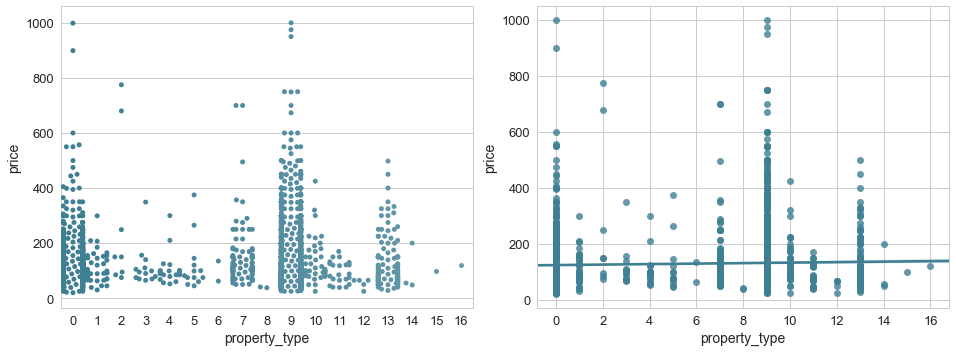

In [40]:
plot_scatter_and_swarm(x = 'property_type', y = 'price', data = df)

In [41]:
le = preprocessing.LabelEncoder()
le.classes_ = np.load('../Label Encoder/property_type.npy')
print(le.inverse_transform(range(0, 17)))

['Apartment' 'Bed & Breakfast' 'Boat' 'Bungalow' 'Cabin' 'Camper/RV'
 'Chalet' 'Condominium' 'Dorm' 'House' 'Loft' 'Other' 'Tent' 'Townhouse'
 'Treehouse' 'Yurt' 'nan']


Yes property type is correlated to price. And most of the property type of Seattle Airbnb is 0 & 9 (after encoding).
Let's confirm by count plot.

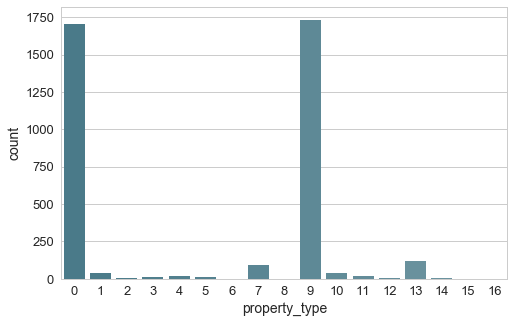

In [42]:
plot_count_plot(df, 'property_type')

In [43]:
nlargest_indexes = df['property_type'].value_counts().nlargest(2).index.values

In [44]:
# Revert by using label encoder.
le = preprocessing.LabelEncoder()
le.classes_ = np.load('../Label Encoder/property_type.npy')
print(le.inverse_transform(nlargest_indexes))

['House' 'Apartment']


Yes property type 0 & 9, which are house & apartment, respectively, are most common property type of Seattle Airbnb.

### As we saw, there were not many Airbnb that can accommodate more than 10 people. Might be related to Seattle is a metropolis. Let's check how many there are & where they are located.

In [45]:
df[df['accommodates'] >= 10].count() / df.count() * 100

neighbourhood_cleansed             1.36197
zipcode                            1.36197
property_type                      1.36197
room_type                          1.36197
accommodates                       1.36197
bathrooms                          1.36197
bedrooms                           1.36197
beds                               1.36197
bed_type                           1.36197
guests_included                    1.36197
cancellation_policy                1.36197
cleaning_fee                       1.36197
price                              1.36197
latitude_longitude_bin             1.36197
neighbourhood_cleansed_reverted    1.36197
shapes                             1.36197
accommodates_bedroom_ratio         1.36197
accommodates_bathroom_ratio        1.36197
dtype: float64

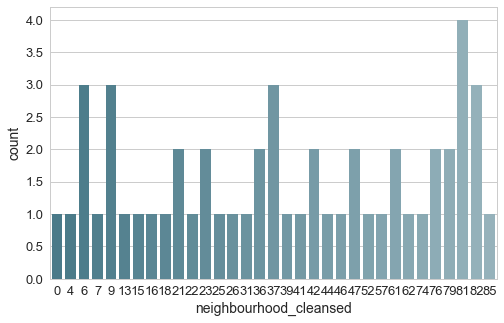

In [46]:
plot_count_plot(df[df['accommodates'] >= 10], 'neighbourhood_cleansed')

In [47]:
nlargest_indexes = df[df['accommodates'] >= 10]['neighbourhood_cleansed'].value_counts().nlargest(5).index.values
nlargest_indexes

array([81,  6,  9, 82, 37])

In [48]:
# Revert by using label encoder.
le = preprocessing.LabelEncoder()
le.classes_ = np.load('../Label Encoder/neighbourhood_cleansed.npy')
print(le.inverse_transform(nlargest_indexes))

['West Queen Anne' 'Briarcliff' 'Broadway' 'West Woodland' 'Leschi']


Only 1.3% of listings can accommodate 10 or more than 10 people, and they are not located in specific neighborhood.

### As we saw 1 bedroom 1 bathroom property is most common in Seattle. Where do they usually located?

In [49]:
df_cnt_1_1_neighbourhood = df[(df.bedrooms == 1) & (df.bathrooms == 1)].groupby(['neighbourhood_cleansed']).size().reset_index(name = "Count").sort_values(by = "Count", ascending = False)
total_1_1 = sum(df_cnt_1_1_neighbourhood['Count'])
df_cnt_1_1_neighbourhood['neighbourhood_cleansed_pct'] = df_cnt_1_1_neighbourhood['Count'].map(lambda x: x / total_1_1)
df_cnt_1_1_neighbourhood.head(5)

,neighbourhood_cleansed,Count,neighbourhood_cleansed_pct
9,9,219,0.104485
4,4,117,0.055821
21,21,94,0.044847
78,79,92,0.043893
75,76,75,0.035782


In [50]:
# Revert by using label encoder.
le = preprocessing.LabelEncoder()
le.classes_ = np.load('../Label Encoder/neighbourhood_cleansed.npy')
nlargest_indexes = df_cnt_1_1_neighbourhood['neighbourhood_cleansed_pct'].nlargest(5).index.values
print(le.inverse_transform(nlargest_indexes))

['Broadway' 'Belltown' 'Fremont' 'View Ridge' 'Sunset Hill']


In [51]:
df_cnt_1_1_area = df[(df.bedrooms == 1) & (df.bathrooms == 1)].groupby(['neighbourhood_cleansed_reverted']).size().reset_index(name = "Count").sort_values(by = "Count", ascending = False)
df_cnt_1_1_area = pd.merge(df_cnt_1_1_area, df_poly, left_on = 'neighbourhood_cleansed_reverted', right_on = 'area', how = 'left')
df_cnt_1_1_area = df_cnt_1_1_area.drop('area', axis = 1)
df_cnt_1_1_area.head(5)

,neighbourhood_cleansed_reverted,Count,shapes
0,First Hill,284,"Poly((15893.4, 18831.1) ...)"
1,Belltown,117,"Poly((11382.3, 20871.9) ...)"
2,Fremont,94,"Poly((11688.9, 28057.4) ...)"
3,Wallingford,92,"Poly((15348.5, 29727.2) ...)"
4,University District,75,"Poly((15677, 29738.5) ...)"


/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


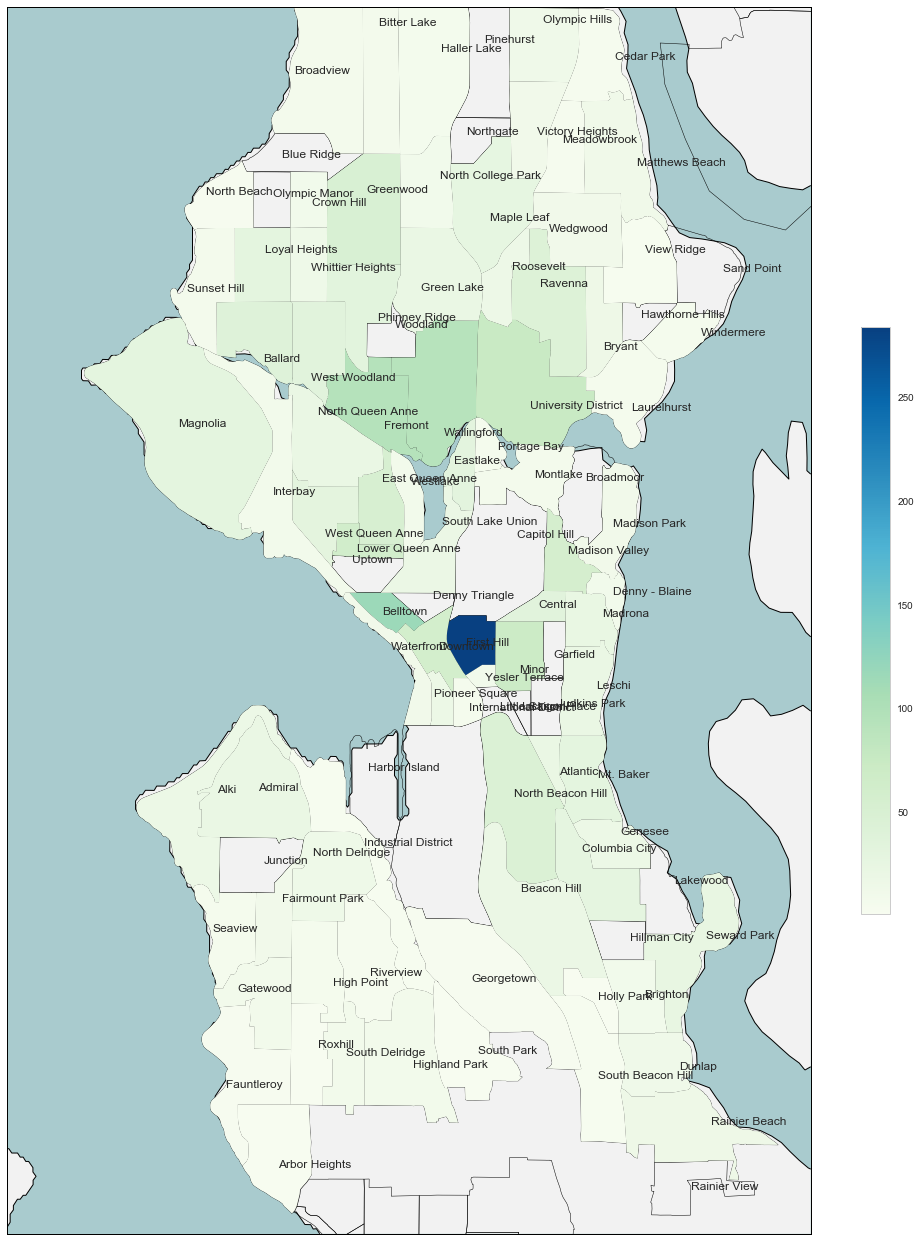

In [52]:
plot_city_map(data = df_cnt_1_1_area, shape_col = 'shapes', val_col = 'Count')

Based on the map and data, over 10% of the 1 bed room 1 bath room Airbnb in Seattle are in First Hill.

## Conclusion
1. As we expected, listing price is correlated to location, property type, accommodates, bedrooms, bathrooms and neighbourhood.
 - There might be extremely high listing price although there's only one bedroom, but rarely happened.
 - If the property has a lot more bathrooms, ex. 8, but it's a dorm, the lising price would not increase proportionally.
 - If the property has a lot more bathrooms, ex. 8, but can only accommodate 2 people, the lising price would not increase proportionally, either.
 - If the property is a big house which can accommodate 14 people but its accommodates vs. bedrooms ratio and/or accommodates vs. bathrooms ratio are higher, that means more traveler need to share the bedrooms / bathrooms, the lising price would not increase proportionally, either.
2. 1 bedroom 1 bathroom Airbnbs which can accommodate 1 ~ 4 people are most common in Seattle.
 - Over 50% of Seattle Airbnb listing are of this type.
 - About 10% of them are located in First Hill.
3. For the rest of Airbnbs, not many of them can accommodate more than 10 people
 - In fact, only 1.3% of listings can accommodate 10 or more than 10 people, and they are not located in specific neighborhoods.